In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.drop(["CustomerID"], axis=1, inplace=True)

## Exploratory Data Analysis

#### Age Frequency using Violin Plot

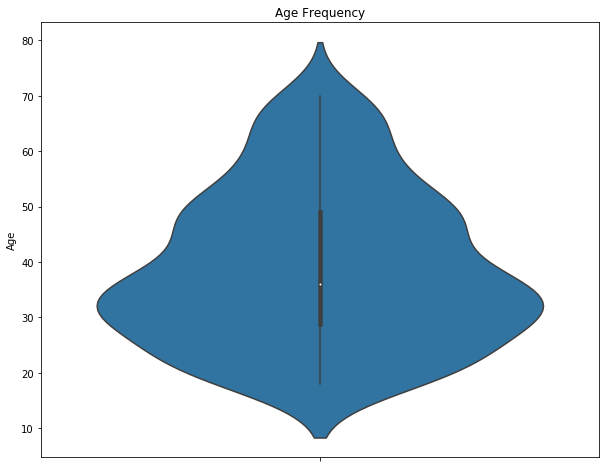

In [7]:
plt.figure(figsize=(10,8))
plt.title("Age Frequency")
sns.violinplot(y = data["Age"])
plt.show()

#### Box plot for Spending Score and Annual Income

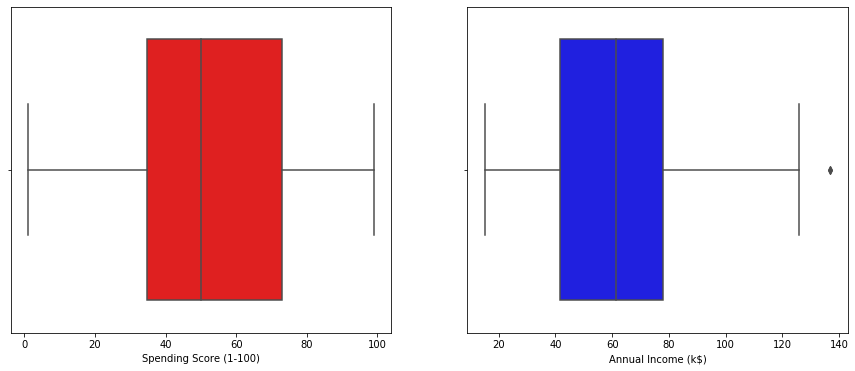

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(data["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(data["Annual Income (k$)"], color="blue")
plt.show()

#### Bar Plot to understand the gender districution in dataset

In [9]:
genders = data.Genre.value_counts()
genders

Female    112
Male       88
Name: Genre, dtype: int64

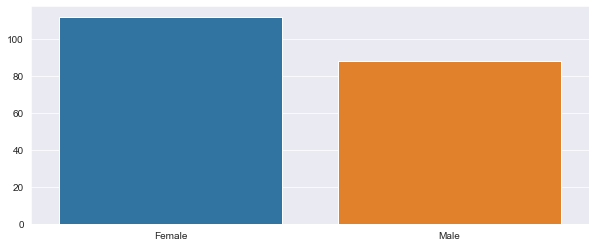

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

####  Number of customers as per ages

In [12]:
age18_25 = data.Age[(data.Age>=18) & (data.Age<=25)]
age26_35 = data.Age[(data.Age>=26) & (data.Age<=35)]
age36_45 = data.Age[(data.Age>=36) & (data.Age<=45)]
age46_55 = data.Age[(data.Age>=46) & (data.Age<=55)]
age55_above = data.Age[(data.Age<=56)]

In [13]:
x = ["age18_25", "age26_35", "age36_45", "age46_55", "age55_above"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55_above.values)]

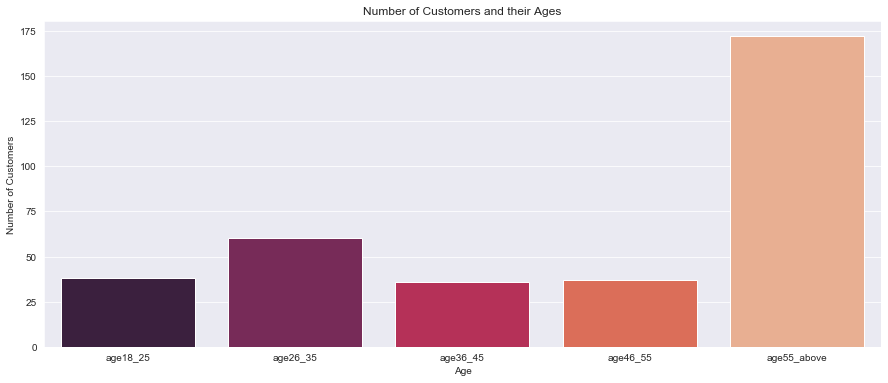

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customers and their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

#### Number of customers vs Spending Score

In [15]:
ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=1) & (data["Spending Score (1-100)"]<=20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=21) & (data["Spending Score (1-100)"]<=40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=41) & (data["Spending Score (1-100)"]<=60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=61) & (data["Spending Score (1-100)"]<=80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"]>=81) & (data["Spending Score (1-100)"]<=100)]

In [16]:
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

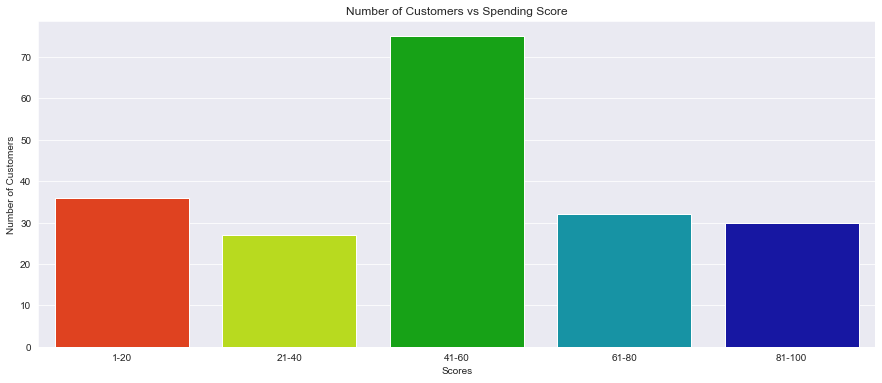

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Number of Customers vs Spending Score")
plt.xlabel("Scores")
plt.ylabel("Number of Customers")
plt.show()

#### Analysis of number of customers based on their annual income 

In [19]:
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=0) & (data["Annual Income (k$)"]<=30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=31) & (data["Annual Income (k$)"]<=60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=61) & (data["Annual Income (k$)"]<=90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=91) & (data["Annual Income (k$)"]<=120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"]>=121) & (data["Annual Income (k$)"]<=150)]

In [20]:
aix = ["$0-$30000", "$30001-$60000", "$60001-$90000","$90001-$1200000","$1200001-$1500000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

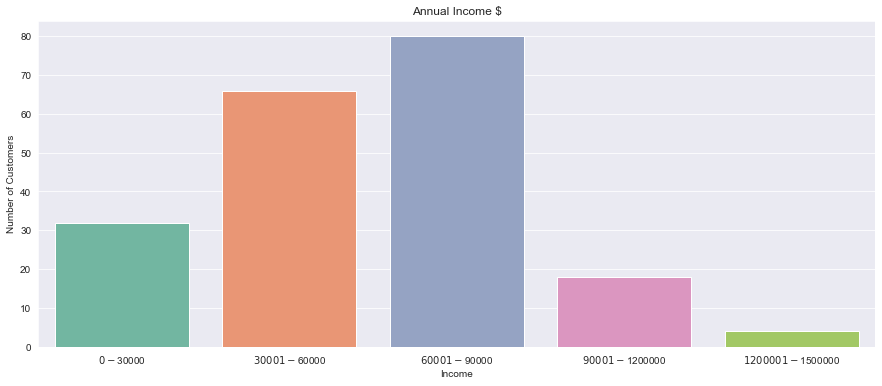

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Income $")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

## Clustering

#### Hierarchical Clustering

In [24]:
dataset = pd.read_csv("Mall_Customers.csv")

In [25]:
X = dataset.iloc[:, [3,4]].values

#### Using the dendrogram to find the optimal number of clusters

In [26]:
import scipy.cluster.hierarchy as sch

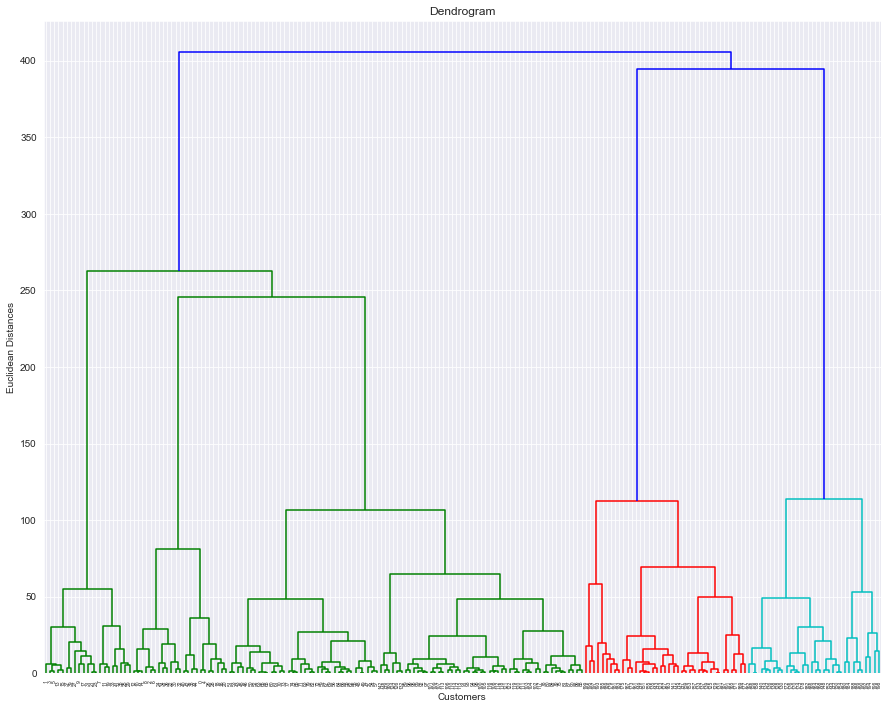

In [31]:
plt.figure(figsize=(15,12))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

#### Training the Hierarchical Clustering Model

In [32]:
from sklearn.cluster import AgglomerativeClustering

##### 5 clusters 

In [33]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [34]:
y_hc = hc.fit_predict(X)

In [35]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


#### Visualising the clusters

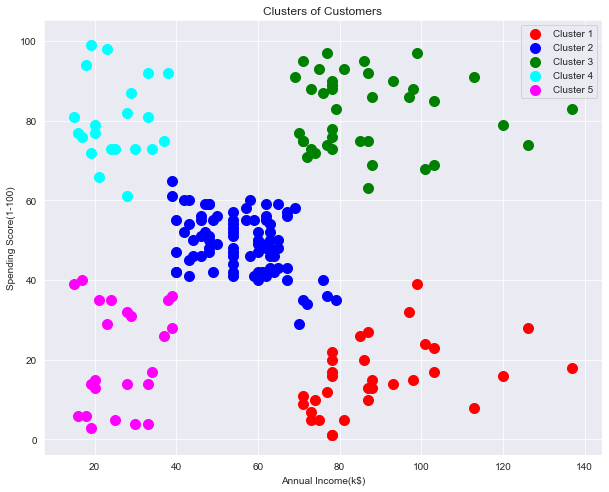

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label="Cluster 1")
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label="Cluster 2")
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label="Cluster 3")
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label="Cluster 4")
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label="Cluster 5")
plt.title("Clusters of Customers")
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

##### 3 Clusters

In [43]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#### Visualising the clusters 

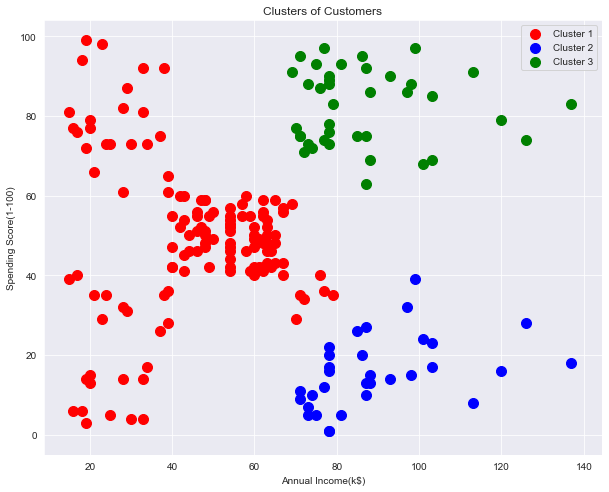

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label="Cluster 1")
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label="Cluster 2")
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label="Cluster 3")
plt.title("Clusters of Customers")
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()